In [214]:
### In here we perform the initial simple tests. The covariates are all independent gaussian variables. We then plot the
### performance against the change of some crucial parameters

In [2]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import itertools
import loli
from heapq import nlargest
from sklearn.cluster import KMeans

Signal strength 1 of 7
Signal strength 2 of 7
Signal strength 3 of 7
Signal strength 4 of 7
Signal strength 5 of 7
Signal strength 6 of 7
Signal strength 7 of 7


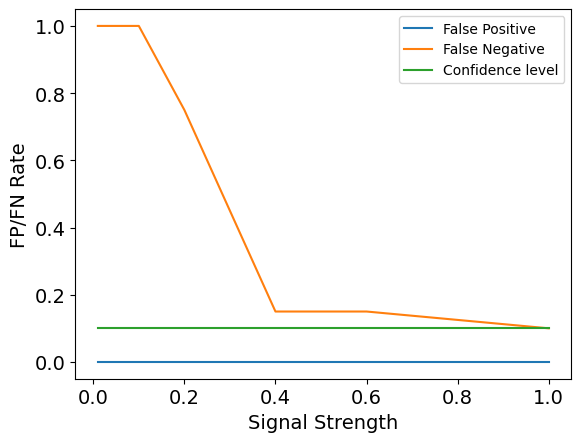

In [3]:
### First test, increasing signal strength
np.random.seed(0)
d=6  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
signal=[0.01,0.05,0.1,0.2,0.4,0.6,1]
fn=np.zeros((len(signal)))
fp=np.zeros((len(signal)))
runs=20
n=10 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,sig in enumerate(signal):
    print('Signal strength',o+1,'of',len(signal))
    for r in range(runs):
        for i in range(I):
            n,d=(X[r][i]).shape
            e=np.random.multivariate_normal(0*np.ones(n),1*np.eye(n))
            Y[r][i]=X[r][i]@(sig*betas[i,:])+e


        plausibleS=loli.gauss(X[r],Y[r],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(signal,fp,label='False Positive')
plt.plot(signal,fn,label='False Negative')
plt.plot(signal,0.1*np.ones((len(signal))),label='Confidence level')
plt.xlabel('Signal Strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
# plt.savefig('Signalchange.eps', format='eps')

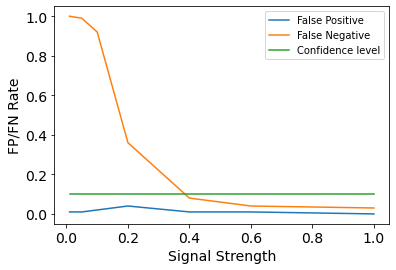

In [189]:
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(signal,fp,label='False Positive')
plt.plot(signal,fn,label='False Negative')
plt.plot(signal,0.1*np.ones((len(signal))),label='Confidence level')
plt.xlabel('Signal Strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()

Signal strength 1 of 5
Signal strength 2 of 5
Signal strength 3 of 5
Signal strength 4 of 5
Signal strength 5 of 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


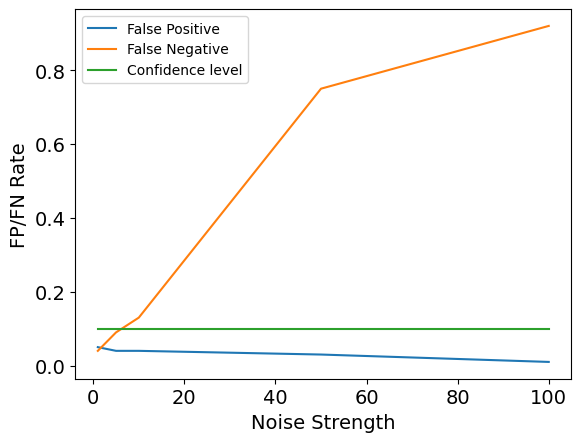

In [10]:
### Second, increasing noise strength
np.random.seed(0)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
noise=[1,5,10,50,100]
fn=np.zeros((len(noise)))
fp=np.zeros((len(noise)))
runs=100
n=10 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,nos in enumerate(noise):
    print('Signal strength',o+1,'of',len(noise))
    for r in range(runs):
        for i in range(I):
            e=np.random.multivariate_normal(0*np.ones(n),(nos)*np.eye(n))
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r],Y[r],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(noise,fp,label='False Positive')
plt.plot(noise,fn,label='False Negative')
plt.plot(noise,0.1*np.ones((len(noise))),label='Confidence level')
plt.xlabel('Noise Strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Noisechange.eps', format='eps')

Sample size 1 of 6
Sample size 2 of 6
Sample size 3 of 6
Sample size 4 of 6
Sample size 5 of 6
Sample size 6 of 6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


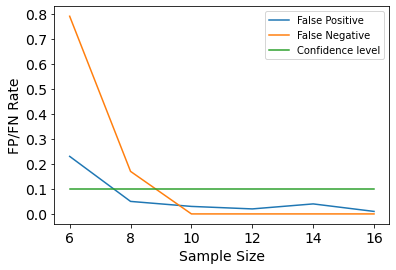

In [192]:
### Changing sample size
np.random.seed(0)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
sample=[6,8,10,12,14,16]
fn=np.zeros((len(sample)))
fp=np.zeros((len(sample)))
runs=100
n=sample[-1] # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for o,n1 in enumerate(sample):
        X[r].append([])
        Y[r].append([])
        for i in range(I):
            x=np.zeros((n,d))
            y=np.zeros((n))
            a=np.random.uniform(low=1,high=5,size=(d))
            for p in range(d):
                x[:,p]=np.random.normal(scale=a[p],size=(n))
            betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
            X[r][o].append(x[:n1])
            Y[r][o].append(y[:n1])


for o,n1 in enumerate(sample):
    print('Sample size',o+1,'of',len(sample))
    for r in range(runs):
        
        for i in range(I):
            e=np.random.multivariate_normal(0*np.ones(n1),1*np.eye(n1))
            Y[r][o][i]=X[r][o][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r][o],Y[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(sample,fp,label='False Positive')
plt.plot(sample,fn,label='False Negative')
plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level')
plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Samplechange.eps', format='eps')

Environments 1 of 7
Environments 2 of 7
Environments 3 of 7
Environments 4 of 7
Environments 5 of 7
Environments 6 of 7
Environments 7 of 7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


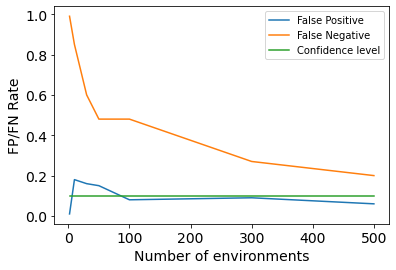

In [193]:
### Changing number of environments
np.random.seed(1)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
environments=[2,10,30,50,100,300,500]
fn=np.zeros((len(environments)))
fp=np.zeros((len(environments)))
runs=100
n=7 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=environments[-1]      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,es in enumerate(environments):
    print('Environments',o+1,'of',len(environments))
    for r in range(runs):
        for i in range(es):
            e=np.random.multivariate_normal(0*np.ones(n),(1)*np.eye(n))
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r][:es],Y[r][:es],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(environments,fp,label='False Positive')
plt.plot(environments,fn,label='False Negative')
plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level')
plt.xlabel('Number of environments',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Environmentchangen=7.eps', format='eps')

Environments 1 of 7
Environments 2 of 7
Environments 3 of 7
Environments 4 of 7
Environments 5 of 7
Environments 6 of 7
Environments 7 of 7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


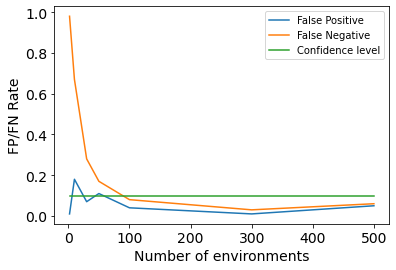

In [194]:
### Changing number of environments
np.random.seed(1)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
environments=[2,10,30,50,100,300,500]
fn=np.zeros((len(environments)))
fp=np.zeros((len(environments)))
runs=100
n=8 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=environments[-1]      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,es in enumerate(environments):
    print('Environments',o+1,'of',len(environments))
    for r in range(runs):
        for i in range(es):
            e=np.random.multivariate_normal(0*np.ones(n),(1)*np.eye(n))
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r][:es],Y[r][:es],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(environments,fp,label='False Positive')
plt.plot(environments,fn,label='False Negative')
plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level')
plt.xlabel('Number of environments',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Environmentchangen=8.eps', format='eps')

Sample size 1 of 9
Sample size 2 of 9
Sample size 3 of 9
Sample size 4 of 9
Sample size 5 of 9
Sample size 6 of 9
Sample size 7 of 9
Sample size 8 of 9
Sample size 9 of 9


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


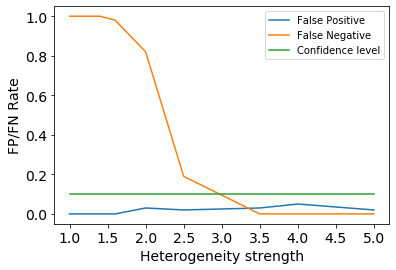

In [13]:
### Changing heterogeinety
np.random.seed(1)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
hetero=[1,1.2,1.4,1.6,2,2.5,3.5,4,5]
fn=np.zeros((len(hetero)))
fp=np.zeros((len(hetero)))
runs=100
n=10 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=500  #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for o,n1 in enumerate(hetero):
        X[r].append([])
        Y[r].append([])
        for i in range(I):
            x=np.zeros((n,d))
            y=np.zeros((n))
            if i%2==0:
                for p in range(d):
                    x[:,p]=np.random.normal(scale=1,size=(n))
            else:
                for p in range(d):
                    x[:,p]=np.random.normal(scale=n1,size=(n))
            betas[i,:s]=np.random.uniform(low=1,high=1,size=(s))
            X[r][o].append(x[:n])
            Y[r][o].append(y[:n])


for o,n1 in enumerate(hetero):
    print('Sample size',o+1,'of',len(hetero))
    for r in range(runs):
        
        for i in range(I):
            e=np.random.multivariate_normal(0*np.ones(n),0.001*np.eye(n))
            Y[r][o][i]=X[r][o][i]@(betas[i,:])+e


        plausibleS=loli.gauss(X[r][o],Y[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(hetero,fp,label='False Positive')
plt.plot(hetero,fn,label='False Negative')
plt.plot(hetero,0.1*np.ones((len(hetero))),label='Confidence level')
plt.xlabel('Heterogeneity strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Figures/HeterochangebigE.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


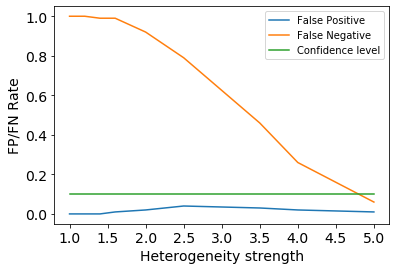

In [11]:
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(hetero,fp,label='False Positive')
plt.plot(hetero,fn,label='False Negative')
plt.plot(hetero,0.1*np.ones((len(hetero))),label='Confidence level')
plt.xlabel('Heterogeneity strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Figures/HeterochangesmallE.eps', format='eps')

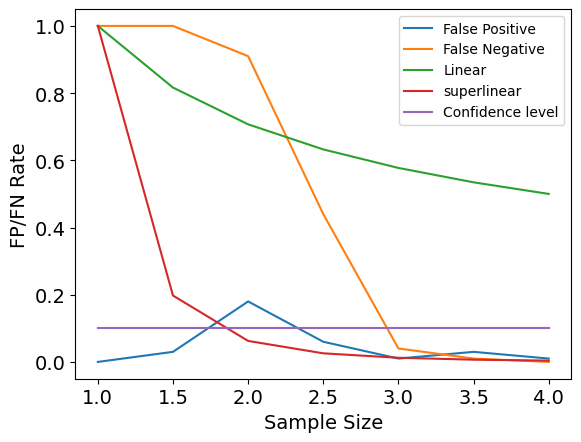

In [143]:
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(hetero,fp,label='False Positive')
plt.plot(hetero,fn,label='False Negative')
plt.plot(hetero,1/(np.array(hetero)**(1/2)),label='Linear')
plt.plot(hetero,1/(np.array(hetero)**4),label='superlinear')
plt.plot(hetero,0.1*np.ones((len(hetero))),label='Confidence level')
plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()

Environments 1 of 7
Environments 2 of 7
Environments 3 of 7
Environments 4 of 7
Environments 5 of 7
Environments 6 of 7
Environments 7 of 7


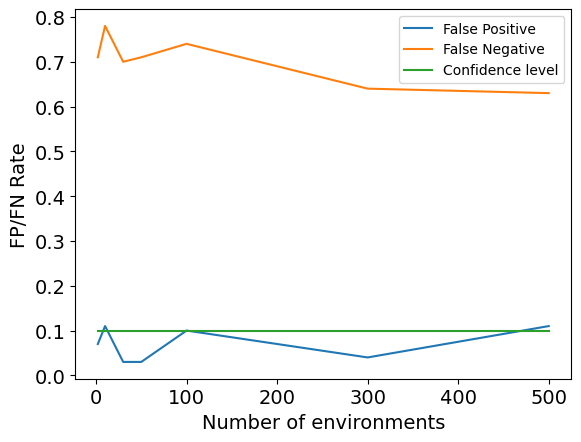

In [41]:
## Chaning environments in a setting that fits the theoretical analysis. In particular we only have two types of environments
## We only have two covariates to avoid affects from multiple testing
np.random.seed(0)
d=2  #Dimensionality
supp=(0,) #support indices
s=len(supp)  #Number of support entries
environments=[2,10,30,50,100,300,500]
fn=np.zeros((len(environments)))
fp=np.zeros((len(environments)))
runs=100
n=5 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=environments[-1]      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        if i%2==0:
            for p in range(d):
                x[:,p]=np.random.normal(scale=1,size=(n))
        else:
            for p in range(d):
                x[:,p]=np.random.normal(scale=2,size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=1,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,es in enumerate(environments):
    print('Environments',o+1,'of',len(environments))
    for r in range(runs):
        for i in range(es):
            e=np.random.multivariate_normal(0*np.ones(n),(0.001)*np.eye(n))
#             e=0
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=loli.gauss(X[r][:es],Y[r][:es],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(environments,fp,label='False Positive')
plt.plot(environments,fn,label='False Negative')
plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level')
plt.xlabel('Number of environments',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
# plt.savefig('Environmentchangen=7.eps', format='eps')